In [15]:

pip install pandas numpy matplotlib seaborn scikit-learn

# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


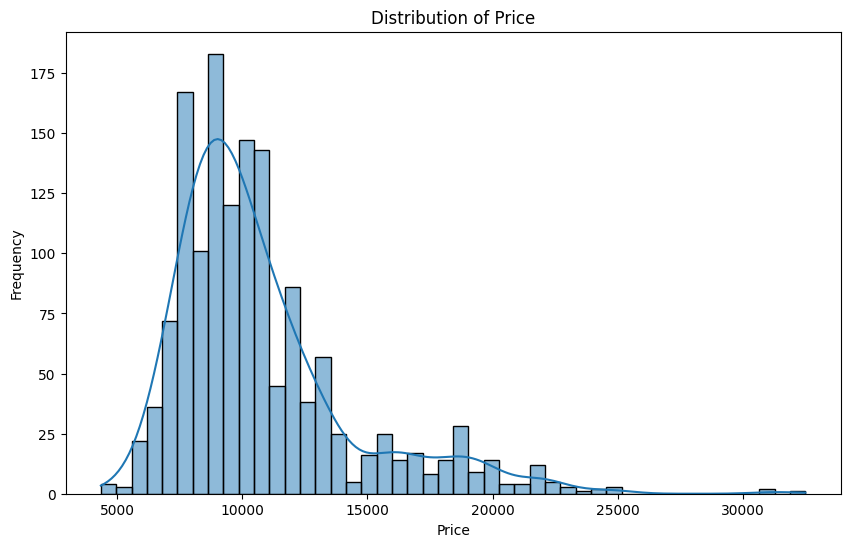

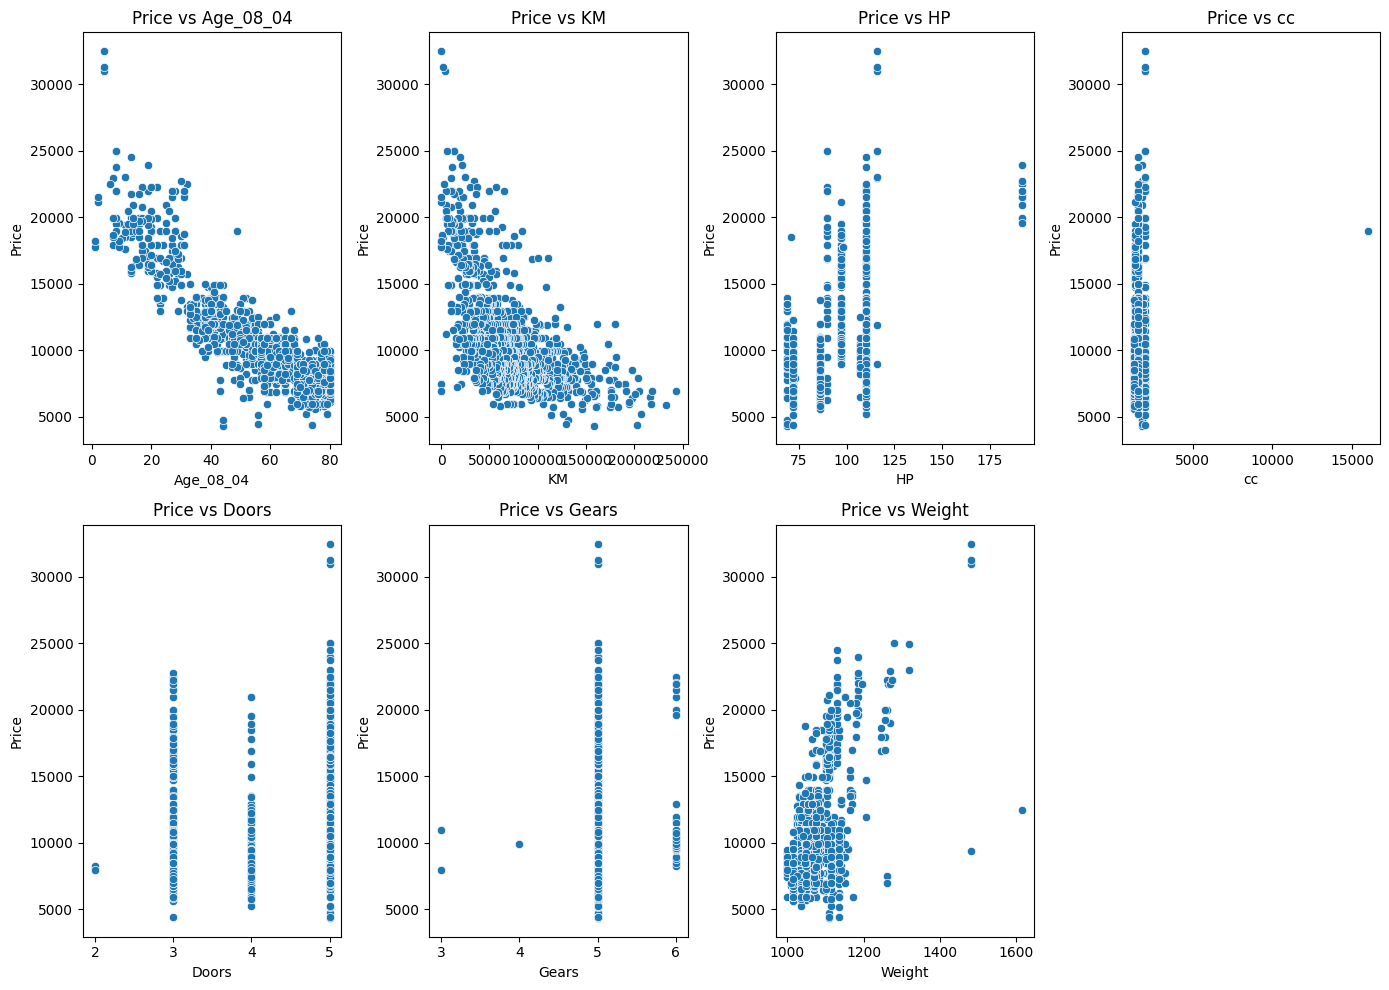

In [6]:

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationships between Price and some features
features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

## 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [13]:

# Define the features (X) and the target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 9), (288, 9), (1148,), (288,))

## 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models. 

In [14]:

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Model 3: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Display the coefficients of the models
print("Linear Regression Coefficients:", lr_model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)

Linear Regression Coefficients: [-1.20467773e+02 -1.62890994e-02  1.33089496e+01 -6.51684410e+01
 -1.47792889e-12  5.31903596e+02  2.61914067e+01 -1.27598295e+02
  1.37868769e+03]
Lasso Regression Coefficients: [-1.20468486e+02 -1.62980426e-02  1.33649133e+01 -6.49584053e+01
  0.00000000e+00  5.29180809e+02  2.61713934e+01 -1.23639825e+02
  1.37795122e+03]
Ridge Regression Coefficients: [-1.20423840e+02 -1.63828371e-02  1.34368296e+01 -6.46162251e+01
  0.00000000e+00  5.23136012e+02  2.61156452e+01 -1.83325624e+02
  1.30505520e+03]


## 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset. 

In [15]:

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
mse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)

print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")
print(f"Lasso Regression - MSE: {mse_lasso}, R²: {r2_lasso}")
print(f"Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}")

Linear Regression - MSE: 2218612.981474518, R²: 0.8337219446801203
Lasso Regression - MSE: 2217681.8588688057, R²: 0.8337917293867974
Ridge Regression - MSE: 2214728.8310844796, R²: 0.8340130495185119


## 5.Apply Lasso and Ridge methods on the model.


In [18]:

from sklearn.model_selection import GridSearchCV

# Lasso Regression with GridSearchCV
lasso = Lasso()
params_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_gs = GridSearchCV(lasso, params_lasso, cv=5)
lasso_gs.fit(X_train, y_train)

print(f"Best Lasso alpha: {lasso_gs.best_params_['alpha']}")
print(f"Lasso Regression Coefficients: {lasso_gs.best_estimator_.coef_}")

# Ridge Regression with GridSearchCV
ridge = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_gs = GridSearchCV(ridge, params_ridge, cv=5)
ridge_gs.fit(X_train, y_train)

print(f"Best Ridge alpha: {ridge_gs.best_params_['alpha']}")
print(f"Ridge Regression Coefficients: {ridge_gs.best_estimator_.coef_}")

# Evaluate the best models
y_pred_lasso_gs = lasso_gs.predict(X_test)
y_pred_ridge_gs = ridge_gs.predict(X_test)

mse_lasso_gs, r2_lasso_gs = evaluate_model(y_test, y_pred_lasso_gs)
mse_ridge_gs, r2_ridge_gs = evaluate_model(y_test, y_pred_ridge_gs)

print(f"Tuned Lasso Regression - MSE: {mse_lasso_gs}, R²: {r2_lasso_gs}")
print(f"Tuned Ridge Regression - MSE: {mse_ridge_gs}, R²: {r2_ridge_gs}")

Best Lasso alpha: 100
Lasso Regression Coefficients: [-1.19541635e+02 -2.04252322e-02  2.85134297e+01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.98234077e+01 -0.00000000e+00
  0.00000000e+00]
Best Ridge alpha: 100
Ridge Regression Coefficients: [-1.20021271e+02 -1.89246248e-02  2.31861285e+01 -3.46171344e+01
  0.00000000e+00  1.67358734e+02  2.21912138e+01 -2.08469817e+02
  3.44917154e+02]
Tuned Lasso Regression - MSE: 1995725.8213480255, R²: 0.8504266353364295
Tuned Ridge Regression - MSE: 2055536.046232288, R²: 0.8459440473568937
